# Graphing: daily new cases and fatalities
This is another tutorial that shows how to use Seaborn to plot data accessed through our package. We will create a plot that shows, for a particular country, the number of new cases and the number of deaths for each day.

In [9]:
import covid19pandas as cod

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime

First, we'll select the data for the country we're looking at.

In [10]:
country = "Iran"

data = cod.get_data_jhu(data_type="all")
data = data.drop(columns="recovered") # Not using for this plot
data = data[data["Country/Region"] == country] # Select rows for the country we're looking at
data = data[["date", "cases", "deaths"]] # We only need these columns
data = data.groupby("date").aggregate(np.sum) # Sum total cases for each day from all provinces
data = data.reset_index()
data.head(10)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


,date,cases,deaths
0,2020-02-19,2.0,2.0
1,2020-02-20,5.0,2.0
2,2020-02-21,18.0,4.0
3,2020-02-22,28.0,5.0
4,2020-02-23,43.0,8.0
5,2020-02-24,61.0,12.0
6,2020-02-25,95.0,16.0
7,2020-02-26,139.0,19.0
8,2020-02-27,245.0,26.0
9,2020-02-28,388.0,34.0


Now we need to calculate the number of new cases and deaths each day. This is simply the number of cases or deaths on a given day, minus the number of cases or deaths the previous day.

In [11]:
temp_cases = list(data["cases"])
temp_cases = [0] + temp_cases[:-1] # Offset all values by 1 row
daily_new_cases = data["cases"] - temp_cases
data.insert(1, "new_cases", daily_new_cases)

temp_deaths = list(data["deaths"])
temp_deaths = [0] + temp_deaths[:-1] # Offset all values by 1 row
daily_deaths = data["deaths"] - temp_deaths
data.insert(1, "daily_deaths", daily_deaths)

data = data[["date", "new_cases", "daily_deaths"]]
data.head(10)

,date,new_cases,daily_deaths
0,2020-02-19,2.0,2.0
1,2020-02-20,3.0,0.0
2,2020-02-21,13.0,2.0
3,2020-02-22,10.0,1.0
4,2020-02-23,15.0,3.0
5,2020-02-24,18.0,4.0
6,2020-02-25,34.0,4.0
7,2020-02-26,44.0,3.0
8,2020-02-27,106.0,7.0
9,2020-02-28,143.0,8.0


Now we use the pandas `melt` function to convert the table to the long format, for plotting.

In [12]:
data = data.melt(id_vars="date", var_name="count_type", value_name="count").sort_values(by="date")
data["count"] = data["count"].apply(pd.to_numeric)
data.head(10)

,date,count_type,count
0,2020-02-19,new_cases,2.0
53,2020-02-19,daily_deaths,2.0
1,2020-02-20,new_cases,3.0
54,2020-02-20,daily_deaths,0.0
2,2020-02-21,new_cases,13.0
55,2020-02-21,daily_deaths,2.0
3,2020-02-22,new_cases,10.0
56,2020-02-22,daily_deaths,1.0
4,2020-02-23,new_cases,15.0
57,2020-02-23,daily_deaths,3.0


Finally, plot the data.

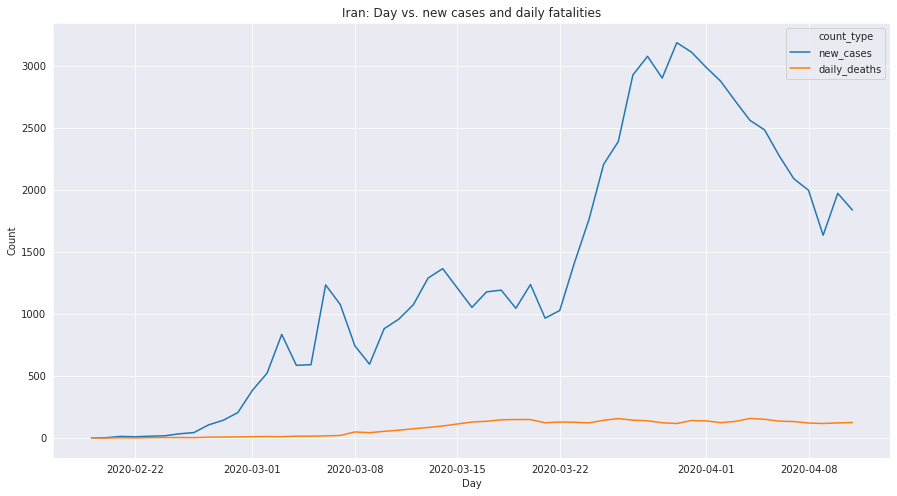

In [13]:
sns.set_style("darkgrid") # Set the plot colors
plt.figure(figsize=(15, 8)) # Set desired dimensions

ax = sns.lineplot(x="date", 
            y="count", 
            data=data,
            hue="count_type")

ax.set(title=f"{country}: Day vs. new cases and daily fatalities",
      xlabel="Day",
      ylabel="Count")

plt.show()

Here is all of that code as a single function. Now we can look at other countries.

In [14]:
def plot_daily_cases_and_deaths(country):
    
    data = cod.get_data_jhu(data_type="all")
    data = data.drop(columns="recovered") # Not using for this plot
    data = data[data["Country/Region"] == country] # Select rows for the country we're looking at
    data = data[["date", "cases", "deaths"]] # We only need these columns
    data = data.groupby("date").aggregate(np.sum) # Sum total cases for each day from all provinces
    data = data.reset_index()
    data.head(10)

    temp_cases = list(data["cases"])
    temp_cases = [0] + temp_cases[:-1] # Offset all values by 1 row
    daily_new_cases = data["cases"] - temp_cases
    data.insert(1, "new_cases", daily_new_cases)

    temp_deaths = list(data["deaths"])
    temp_deaths = [0] + temp_deaths[:-1] # Offset all values by 1 row
    daily_deaths = data["deaths"] - temp_deaths
    data.insert(1, "daily_deaths", daily_deaths)

    data = data[["date", "new_cases", "daily_deaths"]]
    data.head(10)

    data = data.melt(id_vars="date", var_name="count_type", value_name="count").sort_values(by="date")
    data["count"] = data["count"].apply(pd.to_numeric)
    data.head(10)

    sns.set_style("darkgrid") # Set the plot colors
    plt.figure(figsize=(15, 8)) # Set desired dimensions

    ax = sns.lineplot(x="date", 
                y="count", 
                data=data,
                hue="count_type")

    ax.set(title=f"{country}: Day vs. new cases and daily fatalities",
          xlabel="Day",
          ylabel="Count")

    plt.show()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


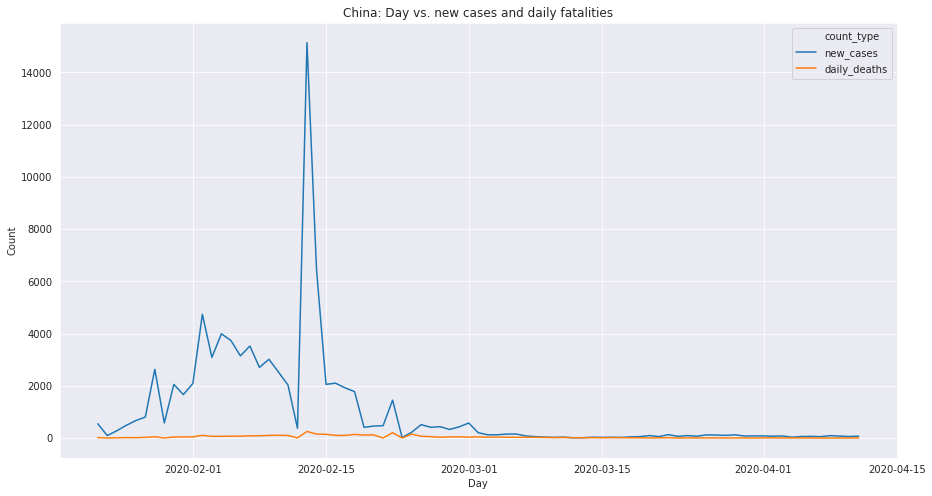

In [15]:
plot_daily_cases_and_deaths("China")

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


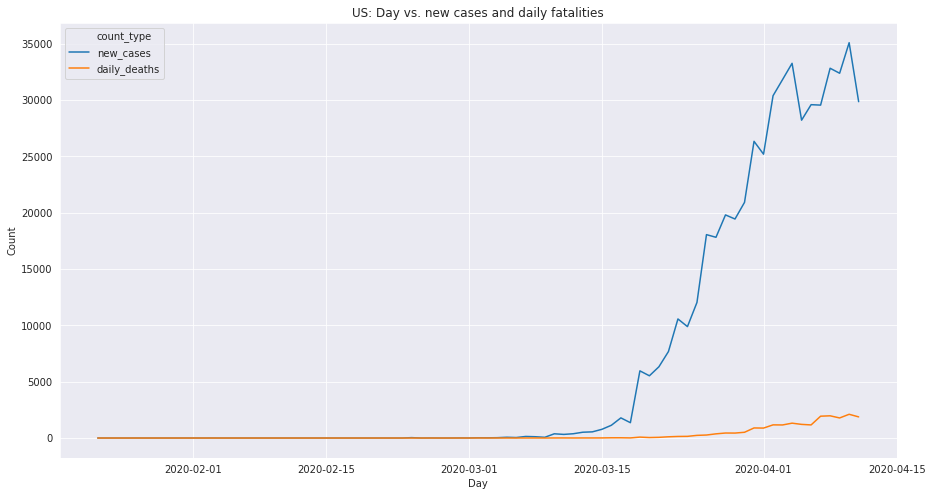

In [16]:
plot_daily_cases_and_deaths("US")